In [22]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Read in Data

In [11]:
frequency_dict = dict()

with open("temp-vis.txt", "r") as f:
    for line in f:
        tokens = line.split(',')
        word = tokens[0]
        frequency = int(tokens[1])
        frequency_dict[word] = frequency
        
frequencies = [frequency_dict[w] for w in frequency_dict]
print(max(frequencies))

cut_off = sorted(frequencies)[-5]
print(cut_off)

90400
2560


### KDE and Histogram Preview

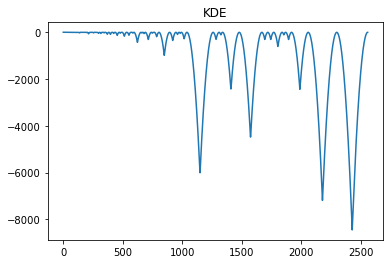

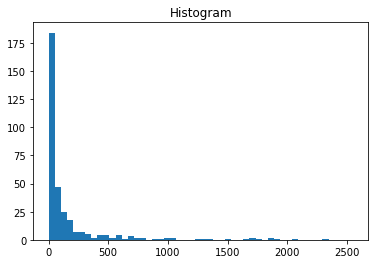

In [20]:
# currently, KDE does not produce reasonable visualizations

a = np.array(frequencies).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(a)
s = np.linspace(0, cut_off, cut_off)
e = kde.score_samples(s.reshape(-1,1))
plt.title("KDE")
plt.plot(s, e)
plt.show()

# histogram works better
plt.title("Histogram")
plt.hist(frequencies, bins = range(0, cut_off, int(cut_off / 50)))
plt.show()

### Generate Wordcloud

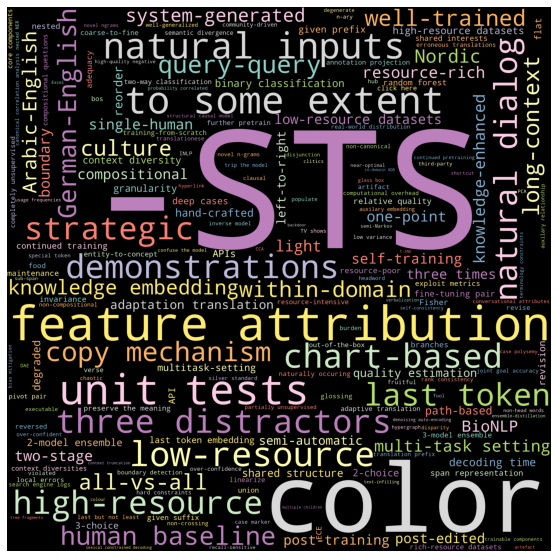

In [25]:
wordcloud = WordCloud(width = 3000, height = 3000,
                      background_color ='black',
                      colormap="Set3",
                      random_state=42,
                      min_font_size = 10).generate_from_frequencies(frequency_dict)

fig, ax = plt.subplots(figsize = (10, 10))

ax.imshow(wordcloud)
ax.axis("off")

plt.savefig("wordcloud.png", dpi=300)
plt.show()